In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t as normt, skewnorm

# z-table lookup:
P_to_z = norm.ppf
z_to_P = norm.cdf

# p-table lookup (one tail):
def t_to_P(t, df):
    return normt.sf(abs(t), df) * 2

P_to_t = normt.ppf

# 1. Statistical Graphics

In [2]:
ages = [22,37,28,63,32,26,31,27,27,28,30,26,29,24,38,25,29,41,30,35,35,33,29,38,54,24,25,46,41,28,40,39,29,27,31,38,29,25,35,60,43,35,34,34,27,37,42,41,36,32,41,33,31,74,33,50,38,61,21,41,26,80,42,29,33,35,45,49,39,34,26,25,33,35,35,28]
ages = pd.DataFrame(ages, columns=['age'])
ages['group'] = np.ceil(ages['age'] / 10.) * 10

## Frequency distribution
Break down data to bins

In [3]:
ages.groupby('group').count().rename(columns={'age':'Frequency'})

,Frequency
group,
30.0,28
40.0,30
50.0,12
60.0,2
70.0,2
80.0,2


## Relative Frequency Distribution

# $ Relative\ Frequency = \frac{Frequency}{n}$

In [4]:
ages.groupby('group').count().rename(columns={'age':'Relative Frequency'}) / len(ages) * 100

,Relative Frequency
group,
30.0,36.842105
40.0,39.473684
50.0,15.789474
60.0,2.631579
70.0,2.631579
80.0,2.631579


## Frequency Distribution Histogram
Frequency distribution visualization as a chart

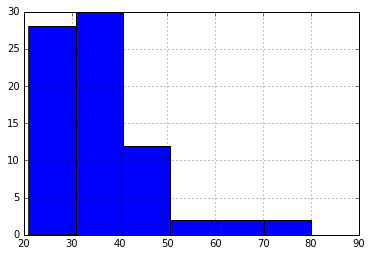

In [5]:
ages['age'].hist(bins=6)

## Cumulative Frequencies

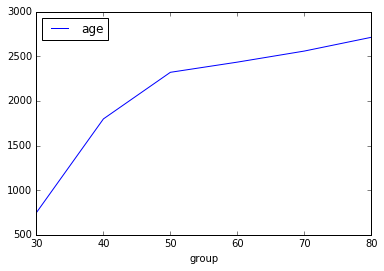

In [6]:
ages.groupby('group').sum().cumsum().plot()

## Right Skewed distribution

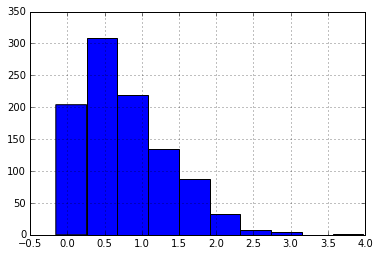

In [7]:
pd.Series(skewnorm.rvs(10, size=1000)).hist()

## Left Skewed

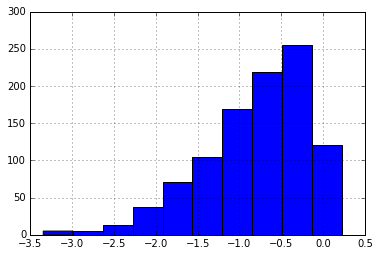

In [8]:
pd.Series(skewnorm.rvs(-10, size=1000)).hist()

# 2. Measures of Center

## Sample Mean $\bar{x}$
pronounced "x-bar"
## $\bar{x}= \frac{ \sideset{}{_{i=1}^n}\sum X_i }{n}$

## Population Mean $\mu$
## $\mu= \frac{ \sideset{}{_{i=1}^N}\sum X_i }{N}$

## Median
- 50th percentile
- Not affected by extreme values

# 3. Measures of Variation

## Range

## Standard Deviation
- sensitive to extreme values

### Sample Standard Deviation - s
## $s = \sqrt{\frac{\sideset{}{_{i=1}^n}\sum(x_i - \bar{x})^2}{n-1}}$

### Population Standard Deviation - σ (lower case sigma).
## $\sigma = \sqrt{\frac{\sideset{}{_{i=1}^N}\sum(x_i - \mu)^2}{N}}$

In [9]:
print('Sample std:', np.std([1, 3, 4, 6], ddof=1))
print('Population std:', np.std([1, 3, 4, 6]))

Sample std: 2.08166599947
Population std: 1.80277563773


## Variance
square of the sample standard deviation

- sample variance = $s^2$
- population variance = $σ^2$




In [11]:
# to get smaple std use ddof=1 !!!!
print('Sample variance:', np.square(np.std([1, 3, 4, 6], ddof=1)) )
print('Population variance:', np.square(np.std([1, 3, 4, 6])))

Sample variance: 4.33333333333
Population variance: 3.25


# 4. Normal Distribution

## Standard Normal Distribution
- Mean (μ) = 0
- standard deviation (σ) = 1

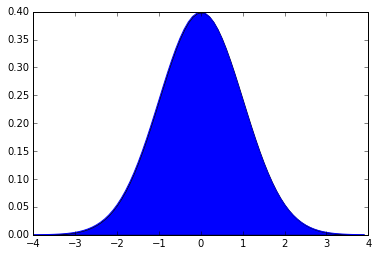

In [12]:
x = np.arange(start=-4, stop=4, step=.1)
y = norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, y)

## Z-Score
- number of standard deviations away from the mean in a normal standard distribution
- [z table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) maps z score to probabilities

## To convert non normal standard distribution to normal:

## $z = \frac{x-μ}{σ}$

## Inverse:
## $x = μ + zσ$

In [13]:
# Example shoes sizes:
μ = 10
σ = 2
# what % has less than 12

# convert value to z
z = (12 - μ) / σ
# from z-table:
P = z_to_P(z)
print('Probability is:', P)

Probability is: 0.841344746069


In [14]:
# Example revese IQ scores:
μ = 100
σ = 15
# what score is at bottom 20%

# from z-table:
z = P_to_z(.2)
# convert z to value
score = μ + z * σ

print('Score at bottom 20%:', score)

# what score is at top 10%
z = P_to_z(.1) * -1
score = μ + z * σ

print('Score at top 10%:', score)

Score at bottom 20%: 87.3756814964
Score at top 10%: 119.223273483


# 5. Central Limit Theorem
(means of samples)
- are in normal distribution, the population could have any distribution
- general rule - n of 30 would create normal distribution for sure, could be less
- have the same mean as original distribution
- standard diviation (standard error of the mean) gets smaller with more samples - n

$μ_\bar{x} = μ_x$

$σ_\bar{x} = \frac{σ_x}{\sqrt{n}} $

## $z = \frac{\bar{x}-μ}{σ_\bar{x}}=\frac{\bar{x}-μ}{\frac{σ_x}{\sqrt{n}}}$


In [15]:
# Example:
# Verbal SAT scores

μ = 509
σ = 112

# Chanse to draw one with socre > 590

z = (590 - μ) / σ
#z = .72
P = 1 - z_to_P(z)

print('Probability to draw one with socre > 590 is ', P)

# Chanse to draw 16 with mean socre > 590
n = 16
σ_16 = σ / np.sqrt(n)
z = (590 - μ) / σ_16
P = 1 - z_to_P(z)

print('Probability to draw 16 with mean socre > 590 is ', P)

Probability to draw one with socre > 590 is  0.234774121707
Probability to draw 16 with mean socre > 590 is  0.00190877444424


# 6. Confidence Intervals for Means

- margin of error - E
- for known population σ_x:

95% confidence = ⍺ of 0.05 and $\frac{⍺}{2}$ = 0.025


## $E = z_\frac{⍺}{2} \frac{σ_x}{\sqrt{n}} $
- for unknown population σ_x we take sample std $σ_\bar{x}$ and use [t-table](https://s3-us-west-2.amazonaws.com/smu-mds/prod/Bridge+to+Statistics/T+Table/t-table.pdf):

## $E = t_\frac{⍺}{2} \frac{s}{\sqrt{n}} $

example: t of ⍺ = .005 for 7 samples ( row 6 ) = 3.707

[SAS screenflow](https://2ds.datascience.smu.edu/mod/page/view.php?id=4247#/cardContent)

In [16]:
# Example with known std of population

ages = [25, 19, 37, 29, 40, 28, 31]
n = len(ages) # 7
σ = 7.08 
x = np.mean(ages) # 29.857142857142858

# what is the true population mean with 95 confidence Interval?
alpha = .05
z_halph_alpha = P_to_z(alpha/2) * -1

E = z_halph_alpha * σ / np.sqrt(n)

inerval = (x - E, x + E)
print('with know σ, population mean with 95 confidence is in interval:', inerval)

# what is the true population mean with 95 confidence Interval when we don't know sigma?
s = np.std(ages)
s = 7.08
df = n -1
t = P_to_t(.025, df) * -1
E = t * s / np.sqrt(n)

inerval = (x - E, x + E)
print('with unknow σ, population mean with 95 confidence is in Interval:', inerval)

with know σ, population mean with 95 confidence is in interval: (24.61230183504393, 35.101983879241786)
with unknow σ, population mean with 95 confidence is in Interval: (23.309234965348502, 36.405050748937214)


## Two-Sample difference of means
( produces normal distribution )

## $μ_\text{12} = μ_1 - μ_2$

### With known σ for populations:

## $σ_\text{12} = \sqrt{\frac{σ_1^2}{n_1} + \frac{σ_2^2}{n_2}}$

## $E = z_\frac{⍺}{2} σ_\text{12}$

### When unknown stds but assume stds of the the populations are the same:

## $S_\text{12} = \sqrt{\frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{n_1 + n_2 -2}}$

## $E = t_\text{⍺/2,df} S_\text{12} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$

 $df$ - degrees of freedom = $n_1 + n_2 - 2$

In [17]:
# Example:
# IBM success age disrimination check

x_u = 46.9565 # unsuccessful
x_s = 43.9333 # successful

n_u = 23
n_s = 30

# std for the tow is the same so it comes from a pool
sp = 6.494
aplha = .1
df = n_u + n_s - 2
t = P_to_t(aplha / 2, df) * -1

E = t * sp * np.sqrt(1 / n_u + 1 / n_s)

x_estimate = x_u - x_s
interval = (x_estimate - E, x_estimate + E)
print('With 90% confidents, the true difference in means is in the interval:', interval)

With 90% confidents, the true difference in means is in the interval: (0.0080122452684534551, 6.0383877547315379)


# 7. Hypothesis Testing Means

In [18]:
# Example:
# Test claim that mean of all bats in 1.9

x = 1.75
S = .2449
n = 8
df = 7

- 1:<br>
Ho: μ = 1.9 <br>
Ha: μ ≠ 1.9
- 2:<br>
Draw, shade and get border t values<br>
⍺ = .05<br>
one side = .025

In [19]:
t_lborder = P_to_t(.025, df) # -2.3646242510103002

- 3:
## $t =\frac{x-μ}{\frac{S}{\sqrt{n}}}$

In [20]:
t = (x - 1.9) / (S / np.sqrt(n)) # -1.7323971772638964

In [21]:
Pval = t_to_P(t, df)

- 4:
Pval = 0.12680634791992446 > .05
- 5:
Fail to reject Ho hipotesis
- 6:
There is not enough evidence to sugest that the mean weight of this speacis is not equal to 1.9 ( Pval = .1269 )

In [22]:
P_to_t(0.005, 29 + 24 - 2)

-2.6757222341106464

# Two sample Hypothesis Test

## $t = \frac{\bar{x_1} - \bar{x_2}}{Sp \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} }}$

In [23]:
n1 = 5 
x1 = -1.2

n2 = 5
x2 = 1.

sp = 1.57797338380595

t = (x1 - x2) / sp * np.sqrt(1/n1 + 1/n2)
t

-0.88176529766182266

In [24]:
P_to_t(.025, 12)

-2.1788128296634182

In [25]:
t_to_P(2.35, 6)

0.057058442238952706